#1 决策树深度的影响

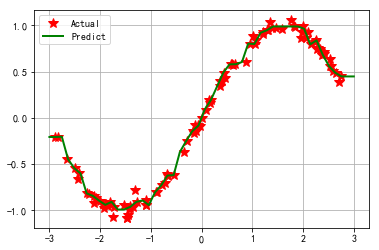

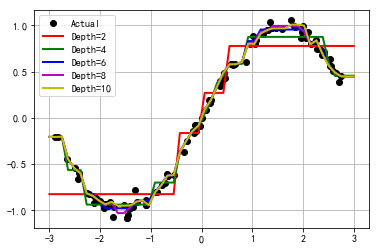

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

N = 100
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

dt = DecisionTreeRegressor(criterion='mse', max_depth=9)
dt.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.plot(x, y, 'r*', ms=10, label='Actual')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 比较决策树的深度影响
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
dtr = DecisionTreeRegressor(criterion='mse')
plt.plot(x, y, 'ko', ms=6, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for d, c in zip(depth, clr):
    dtr.set_params(max_depth=d)
    dtr.fit(x, y)
    y_hat = dtr.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=c, linewidth=2, label='Depth=%d' % d)
plt.legend(loc='upper left')
plt.grid(b=True)
plt.show()

#2 决策树拟合心形

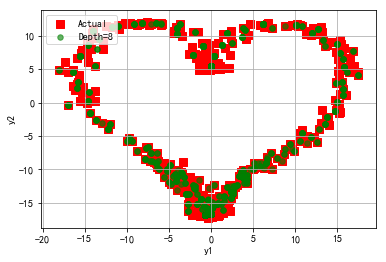

In [2]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

N = 400
x = np.random.rand(N) * 8 - 4     # [-4,4)
x.sort()
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + 0.1* np.random.randn(N)
np.set_printoptions(suppress=True)
y = np.vstack((y1, y2)).T
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

deep = 8
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(-4, 4, num=1000).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.scatter(y[:, 0], y[:, 1], c='r', marker='s', s=60, label='Actual')
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='o', edgecolors='g', s=30, label='Depth=%d' % deep, alpha=0.6)
plt.legend(loc='upper left')
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()
plt.show()

#3 决策树拟合随机数曲线

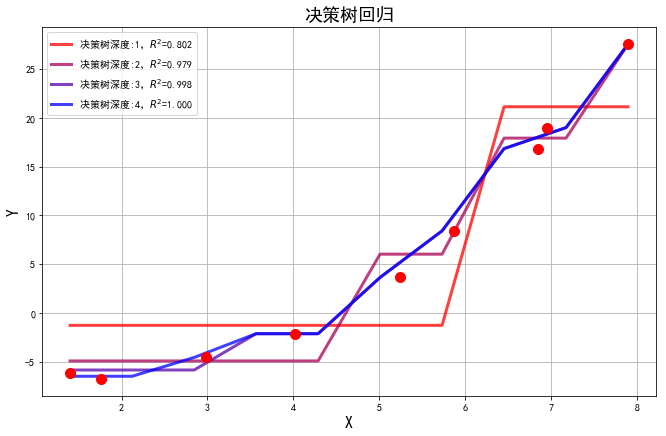

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

deep_length = 4
model = DecisionTreeRegressor(criterion='mse')
clrs = []  # 颜色
for c in np.linspace(16711680, 255, deep_length):
    clrs.append("#{:06X}".format(int(c), 2))
d_pool = np.arange(1, deep_length + 1, 1)  # 阶

label = '决策树回归'

plt.figure(figsize=(18, 12), facecolor='w')
plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro', ms=10, zorder=N)

for i, d in enumerate(d_pool):
    model.set_params(max_depth=d)
    model.fit(x, y)

    x_hat = np.linspace(x.min(), x.max(), num=10)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    label1 = u'决策树深度:%d，$R^2$=%.3f' % (d, s)
    plt.plot(x_hat, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label1)

plt.legend(loc='upper left')
plt.grid(True)
plt.title(label, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.show()